# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

In [1]:
import random
import numpy as np
import tqdm.notebook as tqdm
import matplotlib.pyplot as plt

# 1: Complete the Implementation of the Four Rooms environment 

- The FourRooms is implemented as a python class. We explain the attributes and methods as follows
    - **init** function: Define all the attributes of the Four Rooms environment. For example, the state space, the action space, the start state, the goal state and so on.
    - **reset** function: Resets the agent to the start state (0, 0)
    - **step** function: Takes the current state and one action, returns the next state and a reward
   
- Please complete the implementation in the step function.

In [2]:
# FOUR ROOM ENVIRONMENT
class FourRooms(object):
    def __init__(self):
        # define the four room as a 2-D array for easy state space reference and visualization
        # 0 represents an empty cell; 1 represents a wall cell
        self.four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
        
        # find the positions for all empty cells
        # not that: the origin for a 2-D numpy array is located at top-left while the origin for the FourRooms is at
        # the bottom-left. The following codes performs the re-projection.
        empty_cells = np.where(self.four_room_space == 0.0)
        self.state_space = np.array([[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])])

        # define the action space
        self.action_space = {'LEFT': np.array([-1, 0]),
                             'RIGHT': np.array([1, 0]),
                             'DOWN': np.array([0, -1]),
                             'UP': np.array([0, 1])}
        
        # define the start state
        self.start_state = [0, 0]
        
        # define the goal state
        self.goal_state = [10, 10]
        

    def reset(self):
        """
        Reset the agent's state to the start state [0, 0]
        Return both the start state and reward
        """
        state = self.start_state  # reset the agent to [0, 0]
        reward = 0  # reward is 0
        return state, reward
        

    def step(self, state, act):
        """
        Args: 
            state: a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act: a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state: a list variable containing x, y integer coordinates (i.e., [1, 1])
            reward: an integer. it can be either 0 or 1.
        """
        
        # CODE HERE: implement the stochastic dynamics as described in Q1. 
        # Please note, we provide you with the deterministic transition function "take_action" below.
        # Therefore, you only have to implement the logics of the stochasticity.
        if act == "UP":
            act = np.random.choice(["UP", "LEFT", "RIGHT"], p=[0.8, 0.1, 0.1])
        elif act == "DOWN":
            act = np.random.choice(["DOWN", "LEFT", "RIGHT"], p=[0.8, 0.1, 0.1])
        elif act == "LEFT":
            act = np.random.choice(["LEFT", "UP", "DOWN"], p=[0.8, 0.1, 0.1])
        else:
            act = np.random.choice(["RIGHT", "UP", "DOWN"], p=[0.8, 0.1, 0.1])        
        next_state = state + self.action_space[act]
        check = np.any(np.all(self.state_space == next_state, axis=1))
        if check == False:
            next_state = state
        # CODE HERE: compute the reward based on the resulting state
        for i in next_state:
            if i == 10:
                reward = 1
            else:
                reward = 0
            
        # return the current state, reward
        return next_state, reward
        

    """ DO NOT CHANGE BELOW """
    def take_action(self, state, act):
        """
        Input args: 
            state (list): a list variable containing x, y integer coordinates. (i.e., [1, 1]).
            act (string): a string variable (i.e., "UP"). All feasible values are ["UP", "DOWN", "LEFT", "RIGHT"].
        Output args: 
            next_state (list): a list variable containing x, y integer coordinates (i.e., [1, 1])
        """
        state = np.array(state)
        next_state = state + self.action_space[act]
        return next_state.tolist() if next_state.tolist() in self.state_space else state.tolist()

In [3]:
"""Here is the plot function you can use to generate the figure. DO NOT CHANGE"""
# PLOT FUNCTION
def plot_func(res_list):
    # set the figure size
    plt.figure(figsize=(8, 6))
    
    # plot each trial
    for re in res_list:
        plt.plot(list(range(len(res_list[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward
    mean_reward = np.array(res_list).mean(axis=0).tolist()
    plt.plot(list(range(len(res_list[0]))), mean_reward, linestyle="-", linewidth=2, color="k")

    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

# 2 Implement the manual policy

Use this to check your whether your implementation of the step function is correct.

In [4]:
if __name__ == "__main__":
    IN = input('DO YOU WANT TO IMPLEMENT A MANUAL POLICY ??? ')
    if IN == 'y':
        # fix the randomness for reproduction
        random.seed(1234)
        np.random.seed(1234)

        # create the environment
        env = FourRooms()
        state, reward = env.reset()  # always call reset() before interaction

        # manual time step (YOU CAN CHANGE THIS TO ANY TIME STEP YOU WANT)
        time_step = 100

        # create a loop
        for t in range(time_step):

            # CODE HERE: implement your manual agent/policy function that takes in the action from the standard input
            act = str(input("Enter an action: "))
            next_state, reward = env.step(state, act)
            # CODE HERE: implement the code to interact with the Four Rooms environment above.
            # it should takes in the current state and action and returns the next_state and a reward
            # Hint: use the step function that you implement.
            action = act
            """DO NOT CHANGE BELOW"""
            # print interaction
            print(f"Step = {t}, state = {state}, action = {action}, next state = {next_state}, reward = {reward}")

            # reset if the agent reaches the goal
            if reward == 1:
                print("Reset the agent to the start state!")
                state, reward = env.reset()
            else:
                state = next_state
    else:
        pass

DO YOU WANT TO IMPLEMENT A MANUAL POLICY ??? no


# 3 Implement a random policy

We provide the scaffolding code for running and plotting. Please implement a random policy

**Please note: you should read the code carefully before implementing to make sure the variable names are aligned.**

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

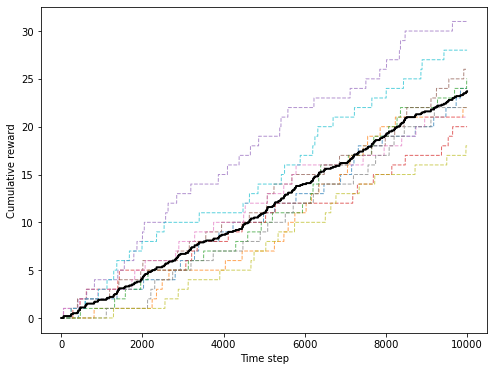

In [5]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list1 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = np.random.choice(["UP", "DOWN", "LEFT", "RIGHT"])
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward =  env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list1.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list1)

# 4 Implement better & worse policies against the Random Policy

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

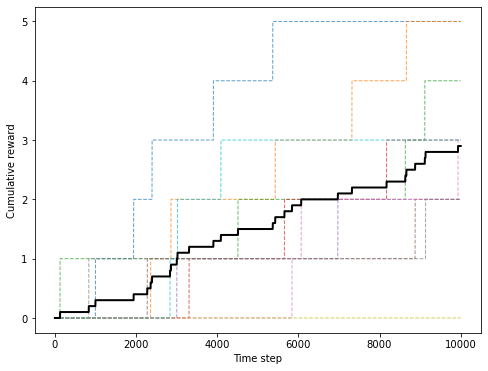

In [6]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail
    trial_num = 10   
    # length of each trail
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list2 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a policy that is worse than the random policy.
            # It should takes in the current state and output an action
            action = np.random.choice(["UP", "DOWN", "LEFT", "RIGHT"], p = [0.1, 0.2, 0.3, 0.4])
                       
            # CODE HERE: please implement the code to get the next state and reward
            next_state, reward = env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list2.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list2)

Run trail:   0%|          | 0/10 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

Episode:   0%|          | 0/10000 [00:00<?, ?it/s]

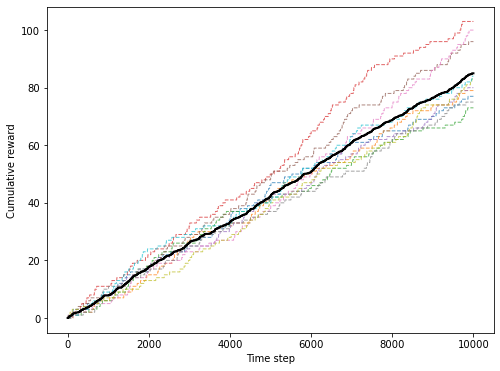

In [7]:
if __name__ == "__main__":
    # fix the randomness for reproduction
    random.seed(1234)
    np.random.seed(1234)
    
    # create the environment
    env = FourRooms()

    # number of the trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_num = 10   
    # length of each trail (YOU CAN MODIFIED HERE WITH SMALL VALUES FOR DEBUG ONLY)
    trial_length = int(1e4)
    
    # save the rewards for plot
    rewards_list3 = []
    
    # run experiment
    for e in tqdm.tqdm(range(trial_num), desc="Run trail", position=0):
        
        # reset for every trail
        reward_per_trial = []
        reward_counter = 0
    
        # reset the environment 
        state, reward = env.reset()
        
        # run each trial
        for t in tqdm.tqdm(range(trial_length), desc="Episode", position=1, leave=False):
            
            
            # CODE HERE: please implement a random policy to obtain an action.
            # it should return a random action from ["UP", "DOWN", "LEFT", "RIGHT"]
            action = np.random.choice(["UP", "DOWN", "LEFT", "RIGHT"], p = [0.5, 0.1, 0.1, 0.3])
                       
            # CODE HERE: please implement the code to get the next state and reward
            # it should takes in the current state and action
            # it should returns the next_state and reward
            next_state, reward =  env.step(state, action)
            
            
            """DO NOT CHANGE BELOW"""
            # save the reward
            reward_counter += reward
            reward_per_trial.append(reward_counter)
            
            # reset
            if reward == 1:
                state, reward = env.reset()
            else:
                state = next_state

        # save the rewards
        rewards_list3.append(reward_per_trial)
        
# PLOT THE RESULTS
plot_func(rewards_list3)

In [8]:
# set the figure size
def plot_func(results = [rewards_list1,rewards_list2,rewards_list3]):
    plt.figure(figsize=(8, 6))
    # plot each trial
    for i in results:
        for re in i:
            plt.plot(list(range(len(i[0]))), re, linestyle="--", linewidth=1, alpha=0.7)

    # plot mean reward

    mean_reward_1 = np.array(rewards_list1).mean(axis=0).tolist()
    mean_reward_2 = np.array(rewards_list2).mean(axis=0).tolist()
    mean_reward_3 = np.array(rewards_list3).mean(axis=0).tolist()

    plt.plot(list(range(len(i[0]))), mean_reward_1, linestyle="-", linewidth=2, color = 'b', label = 'Random Policy')
    plt.plot(list(range(len(i[0]))), mean_reward_2, linestyle="-", linewidth=2, color = 'g', label = 'Worse Policy')
    plt.plot(list(range(len(i[0]))), mean_reward_3, linestyle="-", linewidth=2, color = 'r', label = 'Better Policy')    
    plt.legend()
    # plot the figure
    plt.ylabel("Cumulative reward")
    plt.xlabel("Time step")
    plt.show()

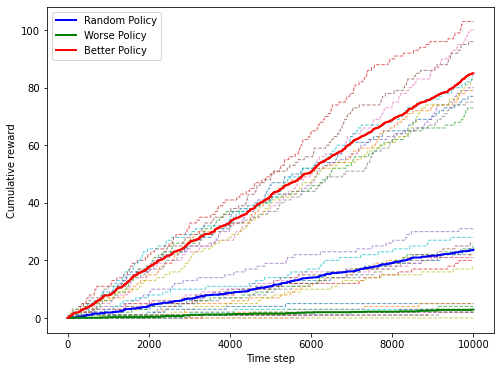

In [9]:
plot_func()